# Import SQL database into Pandas

In [13]:
#import things
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import psycopg2

#copy paste code into notebook
from sqlalchemy import create_engine

#import pws for SQL
from config import Password

In [18]:
# connect to local database

db_user = 'postgres'
db_password = Password
db_host = 'localhost'
db_port = 5432

# This database must already exist
db_name = "EmployeeSQL"

engine = create_engine(f"postgres://{db_user}:{db_password}@{db_host}:{db_port}/{db_name}")


In [20]:
#import all of the dataframes - EMPLOYEES
employees_df = pd.read_sql("SELECT * FROM employees_all", engine)

employees_df

,emp_no,title_id,birthdate,first_name,last_name,gender,hire_date
0,473302,s0001,7/25/1953,Hideyuki,Zallocco,M,4/28/1990
1,475053,e0002,11/18/1954,Byong,Delgrande,F,9/7/1991
2,57444,e0002,1/30/1958,Berry,Babb,F,3/21/1992
3,421786,s0001,9/28/1957,Xiong,Verhoeff,M,11/26/1987
4,282238,e0003,10/28/1952,Abdelkader,Baumann,F,1/18/1991
...,...,...,...,...,...,...,...
300019,464231,s0001,8/14/1958,Constantino,Eastman,M,10/28/1988
300020,255832,e0002,5/8/1955,Yuping,Dayang,F,2/26/1995
300021,76671,s0001,6/9/1959,Ortrud,Plessier,M,2/24/1988
300022,264920,s0001,9/22/1959,Percy,Samarati,F,9/8/1994


In [22]:
#import SALARY
salary_df = pd.read_sql("SELECT * FROM salary", engine)
salary_df.head()

,emp_no,salary
0,10001,60117
1,10002,65828
2,10003,40006
3,10004,40054
4,10005,78228


In [23]:
#import title
dept_name_df = pd.read_sql("SELECT * FROM dept_name", engine)
dept_name_df.head()

,dept_no,dept_name
0,d001,Marketing
1,d002,Finance
2,d003,Human Resources
3,d004,Production
4,d005,Development


In [24]:
#import assignments
emp_assign_df = pd.read_sql("SELECT * FROM emp_dept_assignment", engine)
emp_assign_df.head()

,emp_no,dept_no
0,10001,d005
1,10002,d007
2,10003,d004
3,10004,d004
4,10005,d003


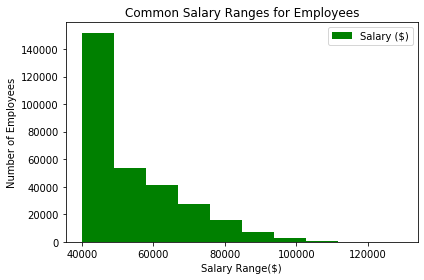

In [25]:
#create histogram for common salary ranges for employees

#find the type of data in each column
salary_df.dtypes

paid = salary_df['salary']
#plot histograms
plt.hist(paid, density=False, color='green', label='Salary ($)')
plt.ylabel('Number of Employees')
plt.xlabel('Salary Range($)')
plt.title('Common Salary Ranges for Employees')
plt.legend()
plt.tight_layout()
plt.savefig('SalaryHistogram')

In [26]:
#Create a bar chart of average salary by title

#merge tables together: employee assignments & salaries
salary_title = salary_df.merge(emp_assign_df, on='emp_no', how='left')
salary_title

#groubpy by dept_no
departments = salary_title.groupby('dept_no')

avg_salary = departments['salary'].mean()
avg_salary

avgsal1 = pd.DataFrame(avg_salary)

#merge title to dataframe

title_sal_avg = avgsal1.merge(dept_name_df, on='dept_no', how='left')
title_sal_avg

,dept_no,salary,dept_name
0,d001,61095.897383,Marketing
1,d002,59533.516546,Finance
2,d003,44678.646801,Human Resources
3,d004,48760.450827,Production
4,d005,48697.334663,Development
5,d006,46456.005717,Quality Management
6,d007,69832.127151,Sales
7,d008,48850.189719,Research
8,d009,47998.670441,Customer Service


In [27]:
title_sal_avg.dtypes

dept_no       object
salary       float64
dept_name     object
dtype: object

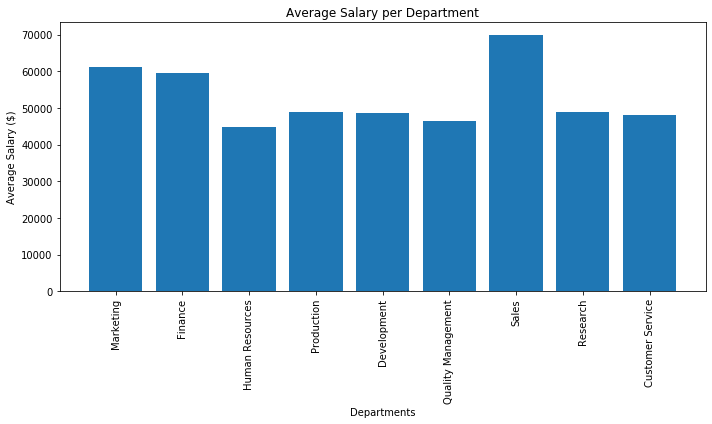

In [28]:
#create bar chart 

x_axis = np.arange(len(title_sal_avg['dept_name']))

plt.figure(figsize=(10,6))
plt.bar(x=x_axis, height=title_sal_avg['salary'])
plt.xticks(x_axis, title_sal_avg['dept_name'], rotation=90)
plt.ylabel('Average Salary ($)')
plt.xlabel('Departments')
plt.title('Average Salary per Department')
plt.tight_layout()
plt.savefig('AvgSalaryBar')